**Introduction:**
This notebook tries to predict the price of diamond based on it's various features. The dataset and description of the same are avaialble in : https://drive.google.com/drive/folders/15Y9t2RwjsYHOKeG6rbZ-nmhiU-rRqDMZ?usp=sharing. 

We are going to perform below tasks for price prediction.

    **Exploratory analysis:**
        Univariate analysis
        Multivariate analysis
    **Preprocessing:**
        Missing values handling
        Handling imbalanced data
        Outliers removal
        Skewness removal
        Feature extraction / addition
    **Model tuning:**
        Hyperparameter tuning
        Cross validation technique
    **Model performance:**
        Performance on training data
        Performance on test data
    

In [55]:
## importing for exploratory analysis
import pandas as ps
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [56]:
## Reading the file
df = ps.read_csv("diamonds.csv", index_col=0)

** Exploratory data Analysis **

In [57]:
df.shape

(53940, 10)

There are 53940 rows and 10 columns in this dataset. Out of these columns one will be target (Independent variable) and remaining should be predictors (dependent variables)

In [58]:
## Checking what data are available
df.head() ## this will show first few elements. We have .sample and .tail to see some elements

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Looks like cut, color and clarity are categorical and remaining are numerical. Let's validate

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


Yes. There are 3 object type elements which are categorical elements (we can further confirm it by checking value_counts). Remaining are float except the target variable price which is integer. 

In [60]:
#df.pivot_table(index='Unnamed: 0') Pivot table is not needed as data has no missing values

In [61]:
##df we already saw first few elements

In [62]:
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [63]:
df.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [64]:
df.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

From above it is visible that cut,color and clarity are categorical columns

In [65]:
## df=df.drop(['Unnamed: 0'],axis=1) this is not needed as we changed this column as index column

Next, we need to understand about the numerical variables and their frequencies in the dataset. 

In [66]:
df.describe() 
## This helps to see the distribution of numerical values. A non-string categorical values can also be included in this

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


From above, carat and z are having very less standart deviation which is lesser than 1. To significantly affect the target variable, we can try to convert them to be categorical variable by setting range. But, let's try that after seeing the results.

**Univariate Analysis**

In this, we will concentrate and learn about the target variable

In [67]:
df.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

Here, Minimum price starting at as low as 300 and maximum price is around 18000. Mean is around 3900. But the 50% values are around 2400. This means the price at higher end are very less. Let's plot the distribution plot to support this claim.

C:\Users\rle0345\AppData\Local\Continuum\Anaconda3\envs\spinningup\lib\site-packages\seaborn\distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


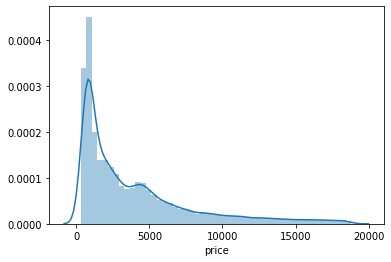

In [68]:
sb.distplot(df.price)
plt.show()

As shown in distplot, the prices are at lower end. More precisely, many diamonds are around 300-2000. It is also important to note that price is not normally distributed

Skewness and Kurtosis

In [69]:
#skewness and kurtosis
print("Skewness: %f" % df.price.skew())
print("Kurtosis: %f" % df.price.kurt())

Skewness: 1.618395
Kurtosis: 2.177696


Skewness is more than 1 which means, the data is right tailed (distplot also shows same). But Kurtosis is lesser than 3. So, these values may not be outliers. Let's proceed and check if we need to handle later stages.

Multivariate analysis

In [70]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

At first, we will see correlation of every variable against the target variable.

In [71]:
correlation = df.corr()

In [72]:
correlation['price'].sort_values(ascending=False)

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64

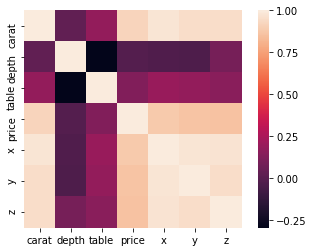

In [73]:
sb.heatmap(correlation,square=True)
plt.show()

This shows that carat, x, y and z are strongly correlated with the price. It is surprising that though depth was derived from x,y and z (it is describled in dataset description), it is negatively affecting the price value. Table is minimally affecting the price

Numerical columns

First, let's see how the data is distributed for every numerical column using distplot

Seaborn Distrbution and Seaborn Kernel Density Estimation (KDE) Plot

Column::carat
Skewness: 1.116646
Kurtosis: 1.256635


C:\Users\rle0345\AppData\Local\Continuum\Anaconda3\envs\spinningup\lib\site-packages\seaborn\distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


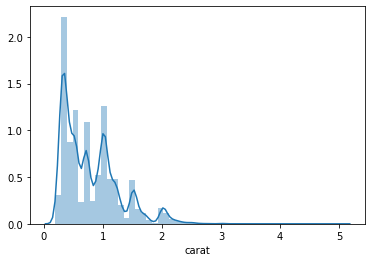

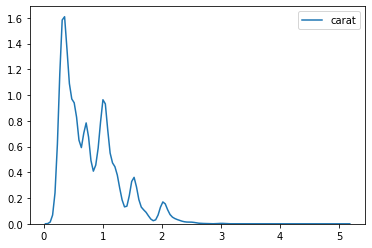

Column::depth
Skewness: -0.082294
Kurtosis: 5.739415


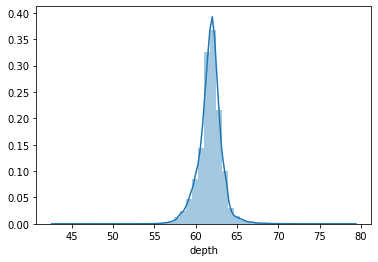

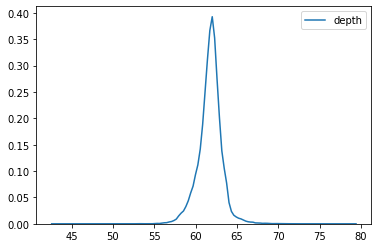

Column::table
Skewness: 0.796896
Kurtosis: 2.801857


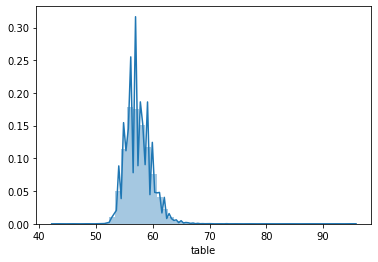

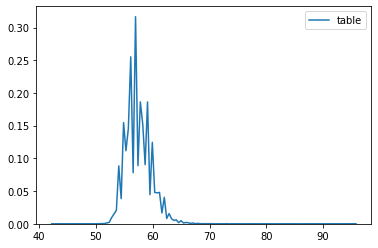

Column::x
Skewness: 0.378676
Kurtosis: -0.618161


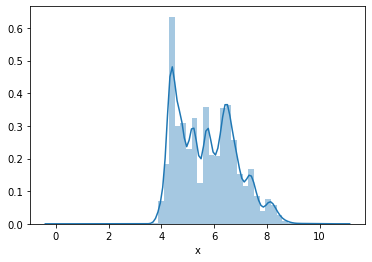

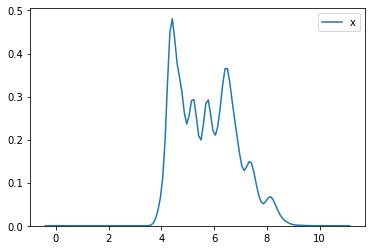

Column::y
Skewness: 2.434167
Kurtosis: 91.214557


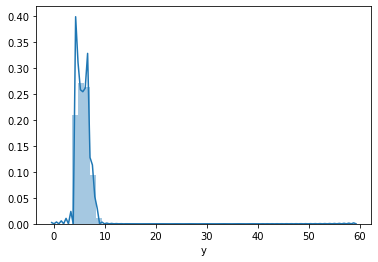

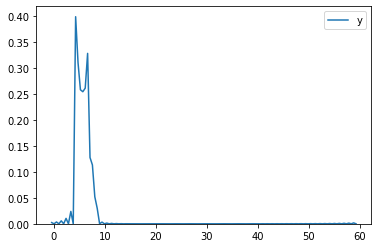

Column::z
Skewness: 1.522423
Kurtosis: 47.086619


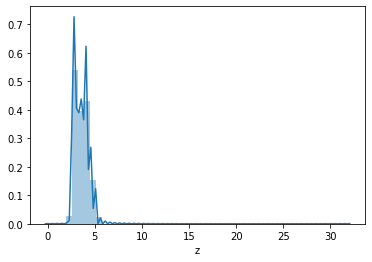

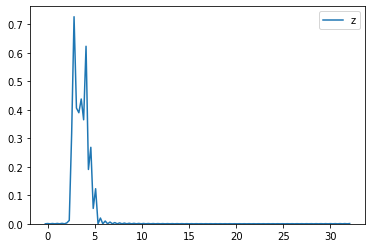

In [74]:
num_columns = ['carat','depth','table','x','y','z']
for each_col in num_columns:
    print("Column::"+each_col)
    print("Skewness: %f" % df[each_col].skew())
    print("Kurtosis: %f" % df[each_col].kurt())
    sb.distplot(df[each_col]) ## Seaborn distribution plot
    plt.show()
    sb.kdeplot(df[each_col]) ## Seaborn Kernel Density Estimation (KDE) Plot
    plt.show()

From this analysis, looks like y and z are having outliers. Also, other elements are not having much difference

Next, let's analyze the scatter of each column with respect to price.

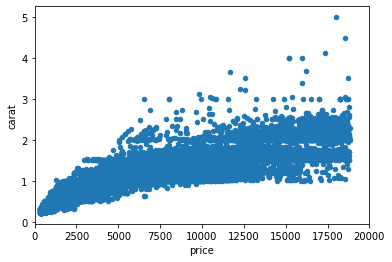

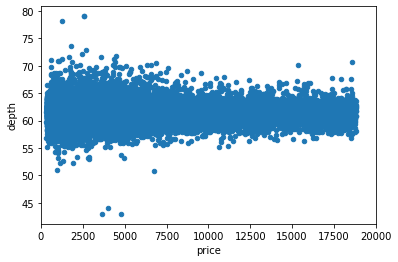

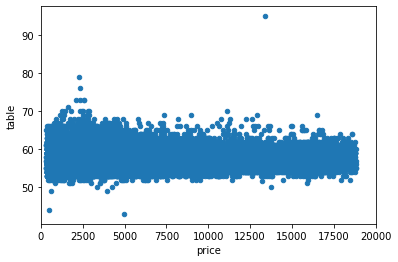

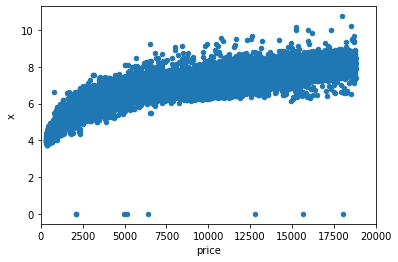

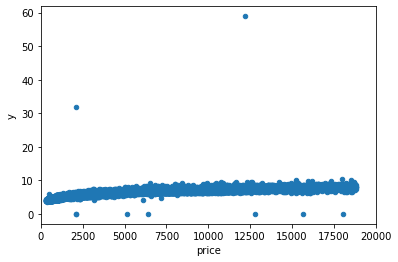

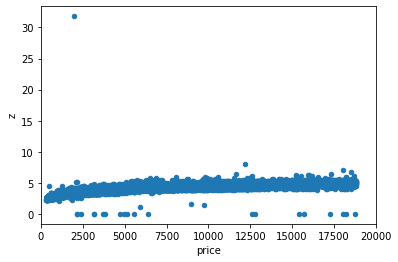

In [75]:
num_columns = ['carat','depth','table','x','y','z']
for each_col in num_columns:
    data = ps.concat([df.price, df[each_col]], axis=1)
    data.plot.scatter(x='price', y=each_col, xlim=(0,20000));
    plt.show()

Except the column 'carat' remaining values are equally distributed across the price range. Columns table, y and z has outliers. If our model performs poor, we will remove these outliers and try fitting.

Categorical columns


Frequency of Categories for varible cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64


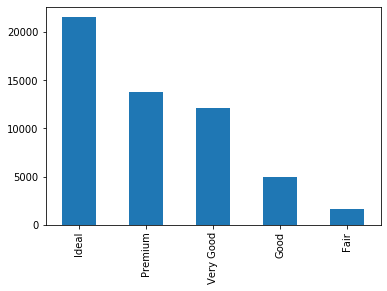


Frequency of Categories for varible color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64


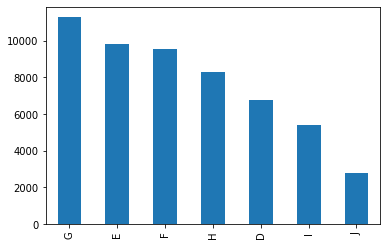


Frequency of Categories for varible clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


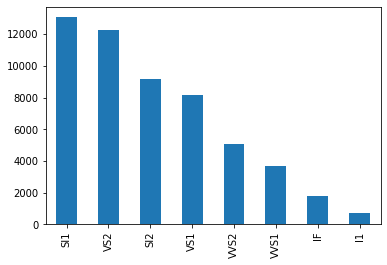

In [76]:
cat_columns = ['cut','color','clarity']
for col in cat_columns:
    print('\nFrequency of Categories for varible %s'%col)
    print(df[col].value_counts())
    df[col].value_counts().plot.bar()
    plt.show()

In [77]:
df.groupby('clarity').cut.value_counts()

clarity  cut      
I1       Fair          210
         Premium       205
         Ideal         146
         Good           96
         Very Good      84
IF       Ideal        1212
         Very Good     268
         Premium       230
         Good           71
         Fair            9
SI1      Ideal        4282
         Premium      3575
         Very Good    3240
         Good         1560
         Fair          408
SI2      Premium      2949
         Ideal        2598
         Very Good    2100
         Good         1081
         Fair          466
VS1      Ideal        3589
         Premium      1989
         Very Good    1775
         Good          648
         Fair          170
VS2      Ideal        5071
         Premium      3357
         Very Good    2591
         Good          978
         Fair          261
VVS1     Ideal        2047
         Very Good     789
         Premium       616
         Good          186
         Fair           17
VVS2     Ideal        2606
         

Next, let's analyze the boxplot of each column with respect to price

C:\Users\rle0345\AppData\Local\Continuum\Anaconda3\envs\spinningup\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


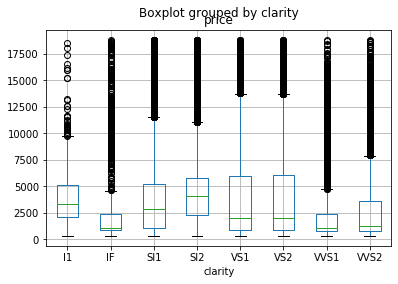

In [78]:
df.boxplot(column='price', by = 'clarity')
plt.show()

C:\Users\rle0345\AppData\Local\Continuum\Anaconda3\envs\spinningup\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


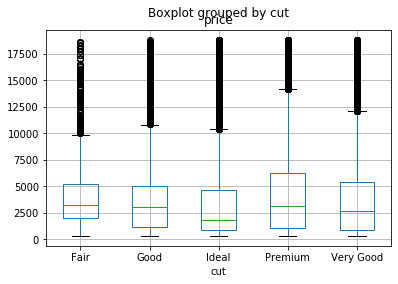

In [79]:
df.boxplot(column='price', by = 'cut')
plt.show()

C:\Users\rle0345\AppData\Local\Continuum\Anaconda3\envs\spinningup\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


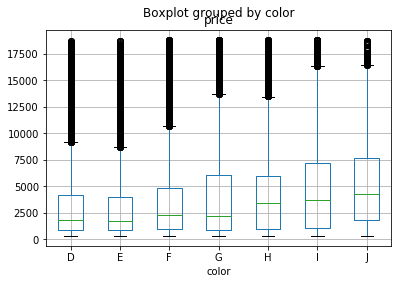

In [80]:
df.boxplot(column='price', by = 'color')
plt.show()

Categorical columns are split evenly for every price range. We don't need to handle any outliers in this case. Next, we will move on to Preprocessing.

** Preprocessing **

In [81]:
df_old = df

Missing values

In [82]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

There are no missing values. So, we don't need to handle them

Next, let's check if there are duplicate values

In [83]:
dup_rows = df.duplicated()
print("Number of Duplicate rows: %d" %(sum(dup_rows)))

Number of Duplicate rows: 146


In [84]:
df[df.duplicated(subset=['carat', 'cut', 'color', 'clarity','depth', 'table', 'price','x', 'y',
       'z'], keep='first')]

,carat,cut,color,clarity,depth,table,price,x,y,z
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1009,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2026,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
2184,1.00,Fair,E,SI2,67.0,53.0,3136,6.19,6.13,4.13
2821,1.00,Fair,F,SI2,65.1,55.0,3265,6.26,6.23,4.07
3157,0.90,Very Good,I,VS2,58.4,62.0,3334,6.29,6.35,3.69
3705,1.00,Ideal,E,SI2,62.9,56.0,3450,6.32,6.30,3.97
3982,1.00,Fair,H,SI1,65.5,57.0,3511,6.26,6.21,4.08


In [109]:
#df[df.duplicated(subset=['carat', 'cut', 'color', 'clarity','depth', 'table', 'x', 'y',
#       'z'], keep='first')]

In [86]:
df=df.drop(df.loc[dup_rows].index)

Next, let's try to find if there are any duplicate columns. First glance shows there are no duplicate columns. Still, let's valuidate once.

In [87]:
column_names = df.columns
for i in range(len(column_names)):
    for j in range(i+1, len(column_names)):
        if np.all(df[column_names[i]] == df[column_names[j]]):
            print(column_names[i], column_names[j])

In [88]:
df.shape

(53794, 10)

From exploratory data analysis, we can see data is not imbalanced. Let's try to deal with outliers and create new features, if model perform poor. 

In [111]:
df_dummy = ps.get_dummies(df) # This converts every categorical data into numerical by converting each categorical 
#value as one column

In [90]:
df_dummy.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [91]:
#It implies there are no duplicate columns in the dataset.Since, we don't have a seperate test data, we randomly select 10% of data as test data to finally test the predictions. This is meant solely for testing the prediction.  It's not meant for cross validation as we do cross validation in train data itself.

In [92]:
#test_data = df_dummy.sample(n=round(0.1*len(df)), replace=True)
#df.shape

In [93]:
#df_dummy.drop(test_data.index)

In [94]:
X_train = df_dummy.drop('price', axis=1)
y_train = df_dummy.price

We are trying LogisticRegression, Ridge, Lasso, DecisionTreeRegressor, Support Vector Regressor

In [112]:
#importing the required modules for train and model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


Splitting the whole dataset into test and train. 30% is in hold for testing purpose 

In [96]:
x_train, x_cv, y_train, y_cv = train_test_split(X_train,y_train, test_size =0.3)

In [97]:
target = 'price'

Next, training the model. We are using KFold cross validation. 10 splits are tested using KFold. i.e., we are doing 10 folded cross validation. Below we define a method for fitting and predicting different ML algorithms.

In [98]:
from sklearn import metrics
def modelfit(alg, dtrain, dtest, train_target, test_target, predictors, target, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], train_target)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    kfold = KFold(n_splits=10, random_state=7)
    results = cross_val_score(alg, dtrain[predictors], train_target, cv=kfold)
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train_target.values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(results)*100,np.std(results)*100,np.min(results),np.max(results)))
    
    #Predict on testing data:
    dtest_predictions = alg.predict(dtest[predictors])
    print("\nModel Report on Test data")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(test_target.values, dtest_predictions)))
    

['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']

Model Report
RMSE : 1135
CV Score : Mean - 91.89 | Std - 0.3029 | Min - 0.9149 | Max - 0.9236

Model Report on Test data
RMSE : 1113


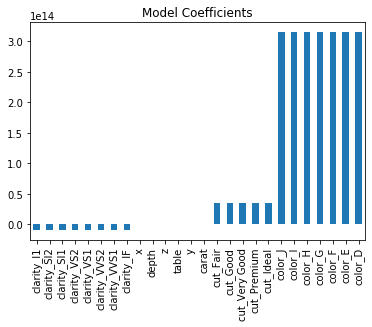

In [99]:
### Linear Regression Model ####
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in df_dummy.columns if x not in [target]]
# print predictors
print(predictors)
alg1 = LinearRegression(normalize=True)
modelfit(alg1, x_train, x_cv, y_train, y_cv, predictors, target, 'alg1.csv')
coef1 = ps.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')
plt.show()

In [100]:
alg1.score(x_cv, y_cv)

0.92163865032578118


Model Report
RMSE : 1255
CV Score : Mean - 90.02 | Std - 0.4439 | Min - 0.8916 | Max - 0.908

Model Report on Test data
RMSE : 1245


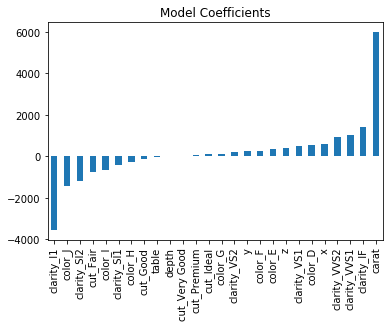

In [101]:
alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2, x_train, x_cv, y_train, y_cv, predictors, target, 'alg2.csv')
coef2 = ps.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')
plt.show()

In [102]:
alg2.score(x_cv, y_cv)

0.90206714589811943


Model Report
RMSE : 906.9
CV Score : Mean - 94.19 | Std - 0.4717 | Min - 0.9334 | Max - 0.9488

Model Report on Test data
RMSE : 929.7


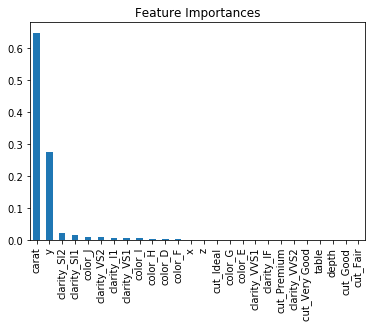

In [103]:
from sklearn.tree import DecisionTreeRegressor

alg3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg3, x_train, x_cv, y_train, y_cv, predictors, target,  'alg3.csv')
coef3 = ps.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')
plt.show()


In [104]:
alg3.score(x_cv, y_cv)

0.94535238963920176


Model Report
RMSE : 1179
CV Score : Mean - 91.2 | Std - 0.4248 | Min - 0.9041 | Max - 0.9203

Model Report on Test data
RMSE : 1158


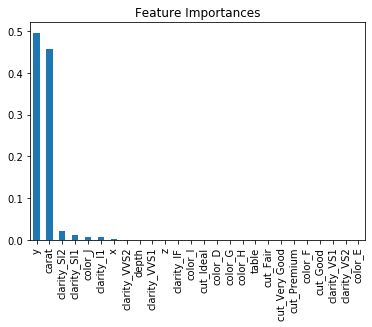

In [105]:
from sklearn.ensemble import RandomForestRegressor

alg5 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
modelfit(alg5, x_train, x_cv, y_train, y_cv, predictors, target,  'alg5.csv')
coef5 = ps.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')
plt.show()

In [106]:
alg5.score(x_cv, y_cv)

0.91517540246971774


Model Report
RMSE : 1811
CV Score : Mean - 78.9 | Std - 1.211 | Min - 0.7573 | Max - 0.8018

Model Report on Test data
RMSE : 1789


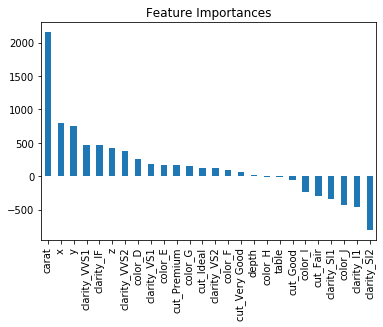

In [107]:
#alg6 = svm.SVR(kernel='linear')
modelfit(alg6, x_train, x_cv, y_train, y_cv, predictors, target, 'alg6.csv')
#alg6.coef_
coef6 = ps.Series(alg6.coef_[0], predictors).sort_values(ascending=False)
coef6.plot(kind='bar', title='Feature Importances')
plt.show()

In [108]:
alg6.score(x_cv, y_cv)

0.79774444727561056

Out of all these models, DecisionTreeRegressor is providing better results with 913.9 Root Mean squared Error for training and 935.6 for testing. It has score of 0.945441. Remaining algorithms are providing slightly lesser results. Support Vector Regressor is performing lower compared to other methods. 

**Conclusion:**

Decision Tree is giving providing better results with score of 94%. Since the dataset is performing better before handling any preprocessing and hyper parameter tuning, we are not attempting to do any of those. This dataset do not have any missing values. It is also noted that doing any preprocessing/tuning might result in overfitting. 